# PERSONILIZED CANCER DATA ANALYSIS

In [1]:
#import the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from io import StringIO

### Load the Data

In [2]:
file_path = r'C:\Users\saiki\Downloads\UNT\ADTA 5240\cancer_data.csv'
# Read the file as bytes
with open(file_path, 'rb') as file:
    file_content = file.read()
# Manually decode the bytes, ignoring errors
decoded_content = file_content.decode('utf-8', errors='ignore')
# Create a DataFrame from the decoded content
data = pd.read_csv(StringIO(decoded_content))

In [3]:
print("Number of Data Points: ", data.shape[0])
print("Number of Features: ", data.shape[1])
data.head()

Number of Data Points:  3321
Number of Features:  5


,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,CBL,W802*,2,Abstract Background Non-small cell lung canc...
2,2,CBL,Q249E,2,Abstract Background Non-small cell lung canc...
3,3,CBL,N454D,3,Recent evidence has demonstrated that acquired...
4,4,CBL,L399V,4,Oncogenic mutations in the monomeric Casitas B...


## Data Preprocessing

1. Data Cleaning
2. Exploratory Data Analysis
3. Feature Engineering
4. Class Imbalence Handling
5. Normalization/ Scaling

In [4]:
# Data Cleaning
# Drop duplicates
data = data.drop_duplicates()

In [5]:
# Exploratory Data Analysis (EDA)
# Display summary statistics
print("\nSummary Statistics:")
print(data.describe())


Summary Statistics:
                ID        Class
count  3321.000000  3321.000000
mean   1660.000000     4.365854
std     958.834449     2.309781
min       0.000000     1.000000
25%     830.000000     2.000000
50%    1660.000000     4.000000
75%    2490.000000     7.000000
max    3320.000000     9.000000


In [6]:
# Feature Engineering
# Extracting the length of the 'Text' column as a new feature
data['Text_Length'] = data['Text'].apply(lambda x: len(str(x)))

In [7]:
# Class Imbalance Handling
# Display the distribution of classes
class_distribution = data['Class'].value_counts()
print("\nClass Distribution:")
print(class_distribution)


Class Distribution:
Class
7    953
4    686
1    568
2    452
6    275
5    242
3     89
9     37
8     19
Name: count, dtype: int64


In [8]:
# Normalization/Scaling (for numerical features)
# Scale them using Min-Max scaling
numerical_features = ['Text_Length']
data[numerical_features] = (data[numerical_features] - data[numerical_features].min()) / (data[numerical_features].max() - data[numerical_features].min())

## Simple Imputation - Handling Missing Values

In [9]:
from sklearn.impute import SimpleImputer

# Identify categorical variables
categorical_columns = ['Gene', 'Variation', 'Text']

# Impute missing values for categorical variables with the most frequent value (mode)
imputer = SimpleImputer(strategy='most_frequent')
data[categorical_columns] = imputer.fit_transform(data[categorical_columns])

# Display the processed dataset
print("\nProcessed Dataset with Imputed Categorical Values:")
print(data.head())


Processed Dataset with Imputed Categorical Values:
   ID    Gene             Variation  Class  \
0   0  FAM58A  Truncating Mutations      1   
1   1     CBL                 W802*      2   
2   2     CBL                 Q249E      2   
3   3     CBL                 N454D      3   
4   4     CBL                 L399V      4   

                                                Text  Text_Length  
0  Cyclin-dependent kinases (CDKs) regulate a var...     0.997283  
1   Abstract Background  Non-small cell lung canc...     0.995971  
2   Abstract Background  Non-small cell lung canc...     0.995971  
3  Recent evidence has demonstrated that acquired...     0.997985  
4  Oncogenic mutations in the monomeric Casitas B...     0.996734  


# Data Visualization
1. Stacked Bar Chart
2. Heat Map
3. Word Cloud
4. Bubble Chart
5. Counter Plot

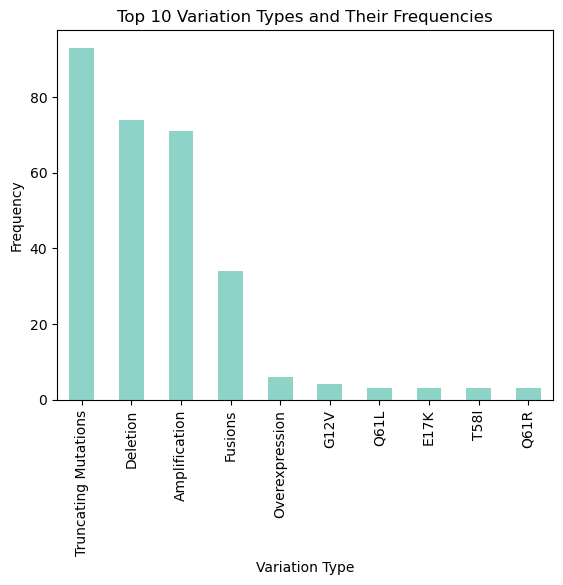

In [10]:
# Stacked Bar Chart
variation_counts = data['Variation'].value_counts().head(10)
variation_counts.plot(kind='bar', stacked=True, colormap='Set3')
plt.title('Top 10 Variation Types and Their Frequencies')
plt.xlabel('Variation Type')
plt.ylabel('Frequency')
plt.show()

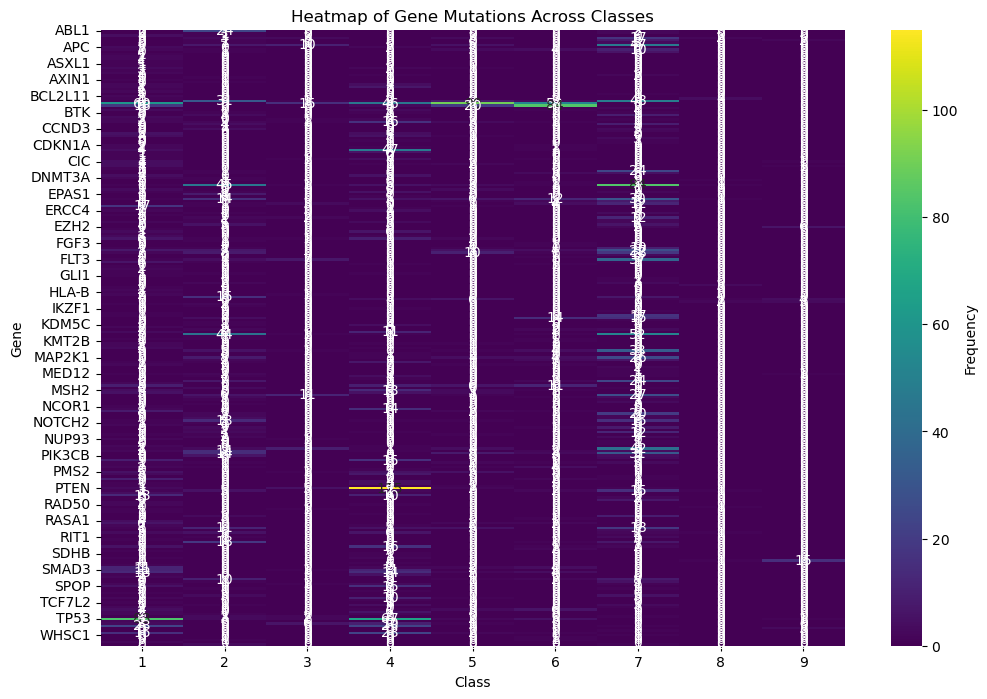

In [11]:
# Heat Map
import seaborn as sns
plt.figure(figsize=(12, 8))
heatmap_data = data.pivot_table(index='Gene', columns='Class', aggfunc='size', fill_value=0)
sns.heatmap(heatmap_data, cmap='viridis', annot=True, fmt='d', cbar_kws={'label': 'Frequency'})
plt.title('Heatmap of Gene Mutations Across Classes')
plt.show()

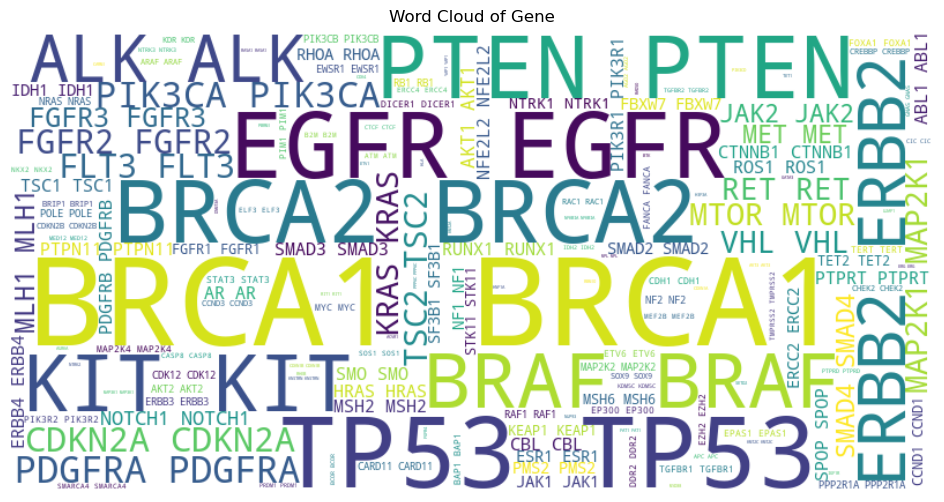

In [15]:
#Word Clud for Gene

from wordcloud import WordCloud

text_data = ' '.join(data['Gene'].astype(str))

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

# Plot Word Cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Gene')
plt.show()

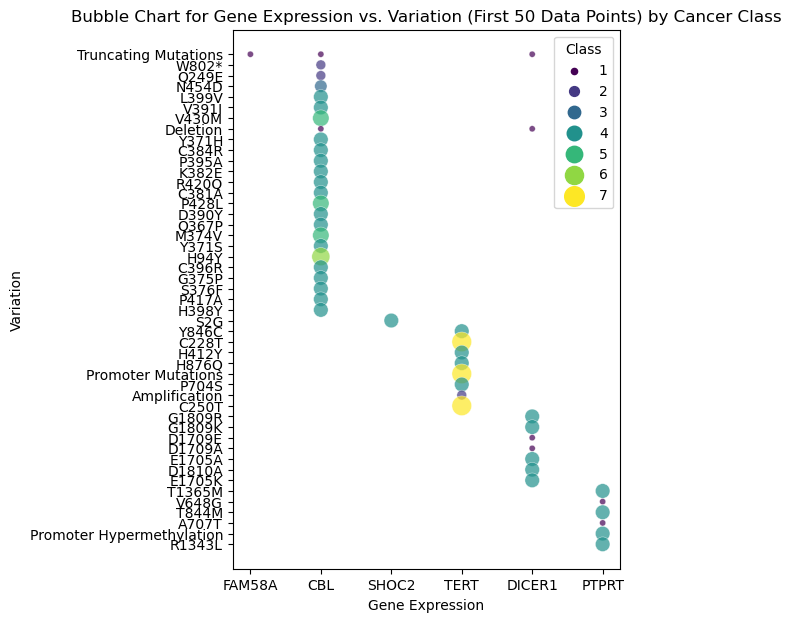

In [26]:
#Bubble chart
plt.figure(figsize=(5,7))
sns.scatterplot(x='Gene', y='Variation', size='Class', hue='Class', data=data.head(50), palette='viridis', sizes=(20, 200), alpha=0.7)
plt.title('Bubble Chart for Gene Expression vs. Variation (First 50 Data Points) by Cancer Class')
plt.xlabel('Gene Expression')
plt.ylabel('Variation')
plt.show()

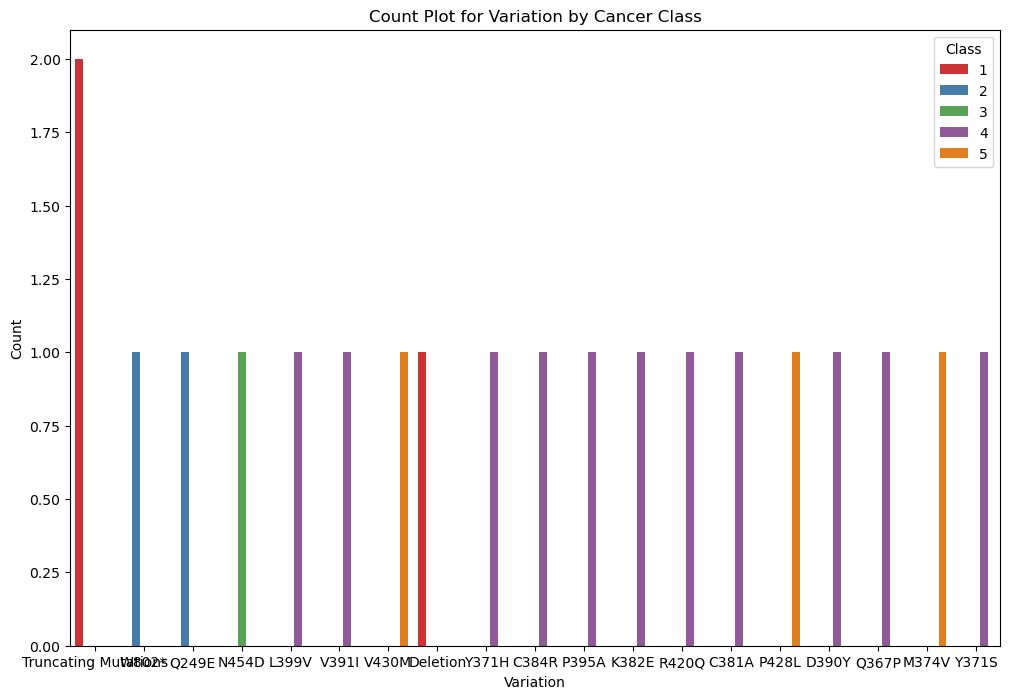

In [33]:
#Counter Plot for Variation by class
plt.figure(figsize=(12, 8))
sns.countplot(x='Variation', hue='Class', data=data.head(20), palette='Set1')
plt.title('Count Plot for Variation by Cancer Class')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()